In [71]:
#Import Necessary Libraries & Dataset, inpsect data
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

RANDOM_STATE = 55

df = pd.read_csv('heart.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [72]:
# One-Hot coding for Categorical Cols

# list out cat cols
cat_variables = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# pd.get_dummies -> basically breaks down cat cols in to multiple dummy variables. i.e. if col_survey contains ['Y', 'N', 'Maybe'], 
# 3 dummy cols replce the original column with col_survey_Y, col_survey_N, col_survey_Maybe, and a bool on whether those values are in the column
# funtion parameters are pd.get_dummies(data = data, prefix = prefix of new cols, columns = columns you want to turn in to bool cols)
df = pd.get_dummies(data = df, prefix = cat_variables, columns = cat_variables)

In [73]:
#inspect new data
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [74]:
# get feature names
features = df.columns.tolist()

features.remove('HeartDisease')
print(features)

print(len(features))

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']
20


In [75]:
# Splitting Dataset in to test & training set

# train_test_split -> a function in sklearn that splits the data in to test & training
# parameters X_train, X_test, y_train, y_test = train_test_split(X, y, 
#   test_size = value between 0-1 where the value is allocated to % test set i.e. if .2 then 20% of dataset is allocated to training, 
#   random_state = numeric basically you set seed)

X_train, X_val, y_train, y_val = train_test_split(df[features], df['HeartDisease'], train_size = 0.8, random_state = RANDOM_STATE)

In [76]:
# Simple Decision Tree Model

# create a list of min_sample_split, and max_depth_list, a range of values to see where to optimize the model to

# min_sample_split_list <- this is the min number of observations needed to continue splitting. i.e. if its 5, and there is 3 observations, stop split
### one thing to note is if min_sample_split is a fraction, then the number of observations in leaf node is total_number of observations * fraction. So fraction value will always be between 0-1
min_sample_split_list = [2, 10, 30, 50, 100, 200, 300, 700]

# mix_depth_list <- is the max number of node layer depth, None means there is no depth limit
max_depth_list = [1,2,3,4,8,16,32,64, None]

In [77]:
# for loop over min_saple_split_list

#initiate STH TO REPLACE
accuracy_list_train = []
accuracy_list_val = []

# for loop
for min_sample_split in min_sample_split_list:
    # Usually in python, modeling takes 2 steps, 
    # 1 -> initiate model with parameters, i.e. model = DecisionTreeClassifier(min_sample_split = etc, random_state = etc)
    # 2 -> train model with data, i.e. model.fit(X_features, target)
    # below is combining the two steps in to one. 
    model = DecisionTreeClassifier(min_samples_split = min_sample_split, random_state = RANDOM_STATE).fit(X_train, y_train)
    
    # What does this do?
    predictions_train = model.predict(X_train) # for every observation in X_train, what is the predicted Y values
    predictions_val = model.predict(X_val) # for every observation in X_val, what is the predicted Y values
    
    # What does this do?
    accuracy_train = accuracy_score(predictions_train, y_train) # how many of the predicted X_train y values is correct 
    accuracy_val = accuracy_score(predictions_val, y_val) # how many of the predicted X_val y values is correct
    
    # Append Accuracy Values to the Initiated list above
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)




[1.0, 0.9455040871934605, 0.8910081743869209, 0.8719346049046321, 0.8501362397820164, 0.8188010899182562, 0.8106267029972752, 0.8106267029972752]
[0.8097826086956522, 0.8043478260869565, 0.8478260869565217, 0.8478260869565217, 0.8369565217391305, 0.8260869565217391, 0.8260869565217391, 0.8260869565217391]


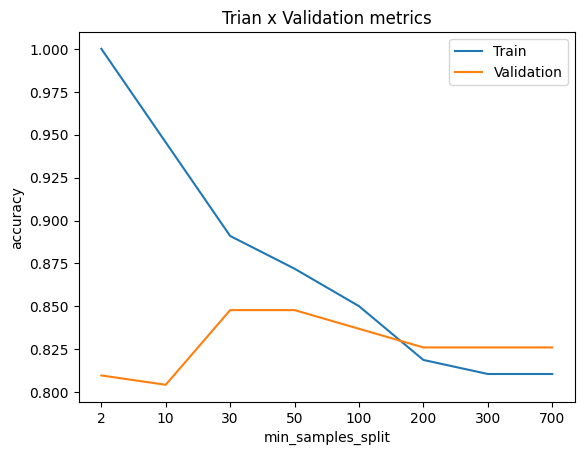

In [82]:
# Inspect the list

print(accuracy_list_train)
print(accuracy_list_val)

plt.title('Trian x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_sample_split_list )),labels=min_sample_split_list)

plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train', 'Validation'])

# From the Validation Graph, you can infer decrease in min_sample_split increase model complexity
# accuracy measures increase as model complexity incrase for training set. intuitively this makes sense, as you are doing more things to fit the data on to the training set
# For the validation set, increaseing in model complexity initially increases model accuracy, but as model starts beocoming overfitted to the training set, the accuracy on the validation set decreases
# so for this case, approx 30 min_sample_split is the best 

In [84]:
# Do this but for max_depth_list

accuracy_list_train = []
accuracy_list_val = []

for max_dep in max_depth_list:
    # Build the model
    model = DecisionTreeClassifier(max_depth = max_dep, random_state = RANDOM_STATE).fit(X_train, y_train)

    # Get the Y_hat vals for both X_train and X_val
    X_train_pred = model.predict(X_train)
    X_val_pred = model.predict(X_val)


    # Get Accuracy Values
    accuracy_train = accuracy_score(X_train_pred, y_train)
    accuracy_val = accuracy_score(X_val_pred, y_val)

    # Append to list
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)


[0.8106267029972752, 0.8106267029972752, 0.8583106267029973, 0.8828337874659401, 0.9700272479564033, 1.0, 1.0, 1.0, 1.0]
[0.8260869565217391, 0.8260869565217391, 0.8641304347826086, 0.8695652173913043, 0.8152173913043478, 0.8097826086956522, 0.8097826086956522, 0.8097826086956522, 0.8097826086956522]


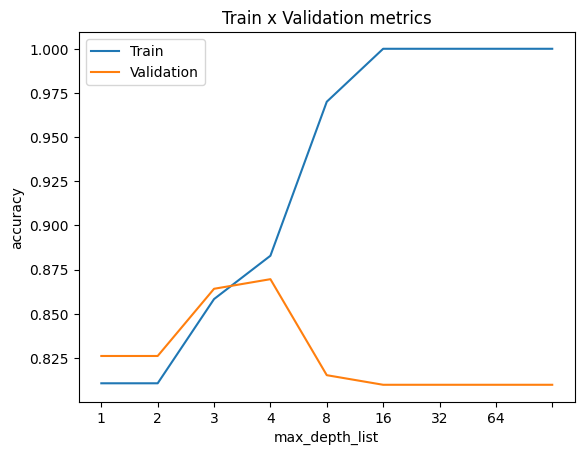

In [85]:
print(accuracy_list_train)
print(accuracy_list_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth_list')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)

plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)

plt.legend(['Train', 'Validation'])

# again an increase in max_depth_list is an increase in model complexity same effect seen in graph

In [87]:
# What we can infer from the two models above, is that optimum model performance occurs when min_split is around 50, and depth of around 4
# We can use this insight to tune the hyperparameters for the composite model, where min_split is 30 and depth is 4

final_model = DecisionTreeClassifier(min_samples_split = 50, max_depth = 3, random_state = RANDOM_STATE).fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
y_val_pred = final_model.predict(X_val)

y_train_accuarcy = accuracy_score(y_train_pred, y_train)
y_val_accuracy = accuracy_score(y_val_pred, y_val)

print(y_train_accuarcy, y_val_accuracy)

0.8583106267029973 0.8641304347826086


In [88]:
# Random Forests

## Optimizing Hyperparameters 
### Min Sample Split
min_sample_split_list = [2, 10, 30, 50, 100, 200, 300, 700]

### Max Depth
max_depth_list = [2, 4, 16, 32, 64, None]

### N Estimators, Number of Decision Trees in the Forest
n_estimators = [10, 50, 100, 500]

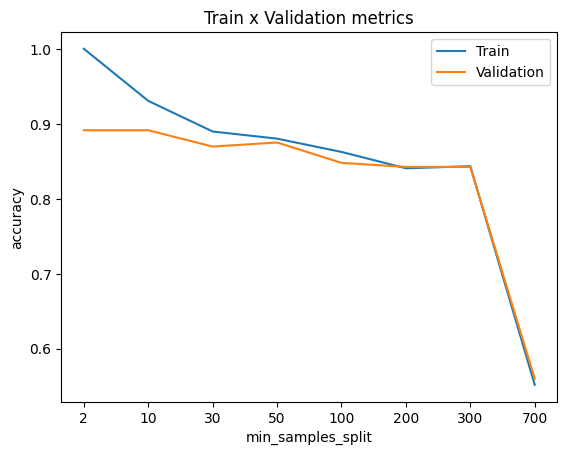

In [89]:
# Min Sample Split

accuracy_list_train = []
accuracy_list_val = []

for min_sample_split in min_sample_split_list:

    # create the model
    model = RandomForestClassifier(min_samples_split = min_sample_split, random_state= RANDOM_STATE).fit(X_train, y_train)

    # get the y estimates
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # get accuracy data of the y estimates
    accuracy_train = accuracy_score(y_train_pred, y_train)
    accuracy_val = accuracy_score(y_val_pred, y_val)

    # get the accuracy score for the y estimates and append it to the accuracy_list
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)


plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_sample_split_list )),labels=min_sample_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

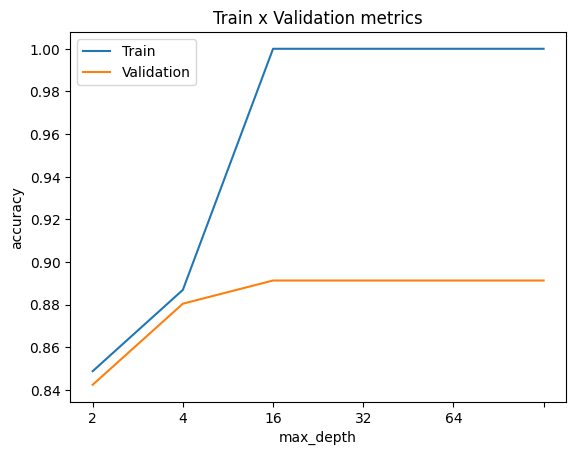

In [94]:
# Max Depth

accuracy_list_train = []
accuracy_list_val = []

for max_dep in max_depth_list:

    model = RandomForestClassifier(max_depth = max_dep, random_state=RANDOM_STATE).fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    y_train_accuarcy = accuracy_score(y_train_pred, y_train)
    y_val_accuracy = accuracy_score(y_val_pred, y_val)
    
    accuracy_list_train.append(y_train_accuarcy)
    accuracy_list_val.append(y_val_accuracy)

    
plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])


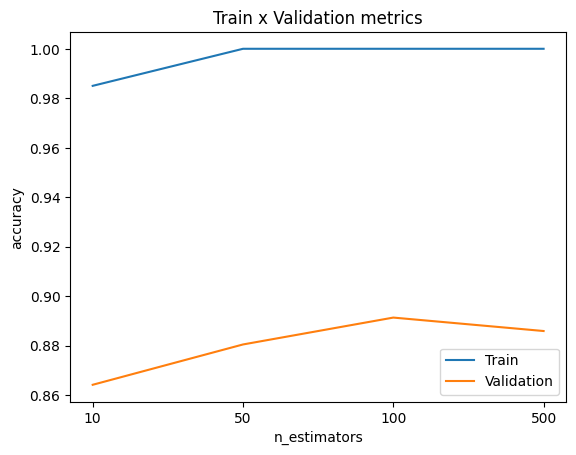

In [97]:
# N Estimators

accuracy_list_train = []
accuracy_list_val = []

for n_estimates in n_estimators:

    model = RandomForestClassifier(n_estimators = n_estimates, random_state= RANDOM_STATE).fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    accuracy_train = accuracy_score(y_train_pred, y_train)
    accuracy_val = accuracy_score(y_val_pred, y_val)

    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators )),labels=n_estimators)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [98]:
# Build the model

random_forest_model = RandomForestClassifier(min_samples_split= 10, max_depth=16, n_estimators=100).fit(X_train, y_train)

# View Results
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9332
Metrics test:
	Accuracy score: 0.8750


In [108]:
# XGBoost
import xgboost
# split train set in to fit set and eval set
n = int(len(X_train)*0.8)

X_train_fit, X_train_eval = X_train[:n], X_train[n:]
y_train_fit, y_train_eval = y_train[:n], y_train[n:]

xgb_model = XGBClassifier(n_estimators=500, learning_rate=0.1, verbosity=1, random_state=RANDOM_STATE)
xgb_model.fit(
    X_train_fit, y_train_fit, 
    eval_set = [(X_train_eval,y_train_eval)], 
    early_stopping_rounds = 10
    )


TypeError: XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'